Aneta Swianiewicz <br>
6CCM359A Numerical and Computational Methods <br>
Practical 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1
Implement the Simpson's rule of numerical integration, and use it in order to estimate the integral $\int_{-\infty}^\infty dx\,e^{-x^2/2}$. Try to choose the number of divisions so that the error is of order $10^{-4}$. What is the exact value of this integral? <br>
Hint: you must make the integration region finite first! What is a good estimate of the error due to cutting the infinite integration region to a finite interval?


In [3]:
def f(x):
    return np.exp((-x**2)/2)

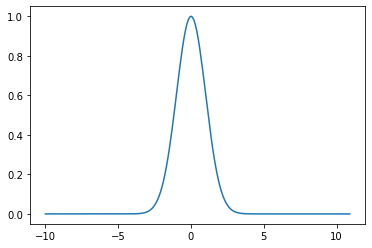

In [15]:
x = np.arange(-10,11,0.1)
y = [f(i) for i in x]
plt.plot(x,y)
plt.show()

In [4]:
def Simpsons(f,a,b,n):
    # n - number of interval divisons
    x = np.linspace(a,b,n)
    return sum([(x[i+1]-x[i])/6*(f(x[i])+4*f((x[i] + x[i+1])/2)+f(x[i+1])) for i in range(len(x)-1)])

In [11]:
Simpsons(f, -6, 6, 10)

2.506653438123175

## Question 2
Write a function $\tt Integrator(f,x)$ which integrates the function $\tt f$ from $-2$ to $x$ with the middle-point rule, for the subinterval length $h=0.2$. this should work both for $x>-2$ (positive integral) and $x<-2$ (negative integral), and should take care of the discretisation in $x$ induced by $h$. Using this, plot the result of the integral $\int_{-2}^x dy\,y^2$ for $x$ between $-4$ and $4$ and 200 points, and compare with the analytical formula.


In [16]:
def midpoint(f,a,b,h):
    return sum(list(map(lambda x: f(x), np.arange(a+h/2,b+h/2,h))))*h

In [26]:
def Integrator(f,x):
    x_list = None
    if x > -2:
        return midpoint(f, -2, x, 0.2)
    else:
        return -midpoint(f, x, -2, 0.2)

In [19]:
def g(y):
    return y**2

In [23]:
def G(y):
    return (y**3)/3 + 8/3

In [27]:
x = np.linspace(-4,4,200)
y = [Integrator(g, i) for i in x]
Y = [G(i) for i in x]

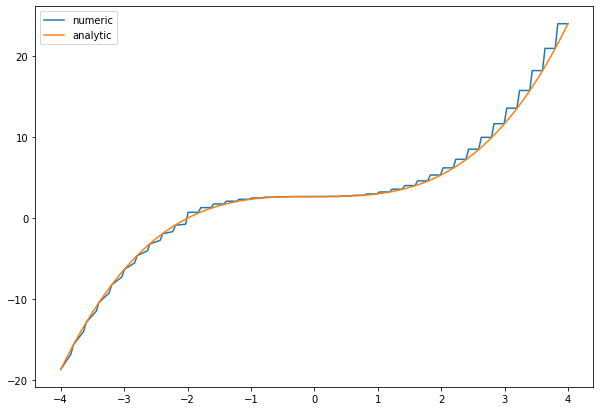

In [29]:
plt.figure(figsize=(10,7))
plt.plot(x,y, label="numeric")
plt.plot(x,Y, label="analytic")
plt.legend()
plt.show()

## Question 3
Use the Euler method to solve the equation $y″(x)=−y′(x)$ with the initial conditions $y(0)=0$ and $y′(0)=1$. Plot your solution against the exact solution $y(x)=1−e^{-x}$.

In [37]:
def f(x, y_v):
    return -y_v[1]

In [38]:
def F_v(f, x, y_v):
    #size
    n = len(y_v)
    
    result = np.zeros(n)
    
    for i in range(n-1):
        result[i] = y_v[i+1]
        
    result[-1] = f(x, y_v)
    
    return result

In [39]:
def Euler(init, interval, n, F, f):
    #increment
    h = abs(interval[1]-interval[0])/n
    
    #initialize x
    x = np.arange(interval[0], interval[1]+h, h)
    
    #initialize y
    y = np.zeros((n+1, len(init)))
    y[0] = init
    
    #populate y
    for i in range(n):
        y[i+1] = y[i] + h*F(f, interval[0]+i*h, y[i])
        
    return x, y


In [40]:
init = [0.,1.]
x, y = Euler(init, [0,10], 1000, F_v, f)

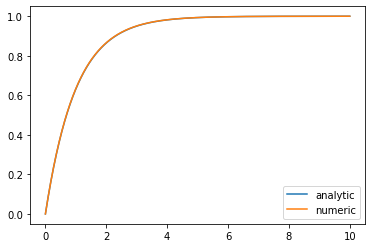

In [41]:
plt.plot(x, 1-np.exp(-x), label="analytic")
plt.plot(x, y[:,0], label="numeric") # columns y - [y, y']
plt.legend()
plt.show()

## Question 4
Replace the recursion relation in the Euler method by $\vec y (x+h)=\vec y (x)+\vec K_1$, where $K_1= h\vec F(x+h/2,y+\vec K_0/2)$ and $\vec K_0 = h\vec F(x,\vec y)$, and $\vec F(x,\vec y)$ is as usual what enters the way of writing the differential equation as $\vec y' = F(x,\vec y)$. For the same problem as in Question 3, compare the precision of the new recursion relation against that of the Euler method, by plotting the difference of the numerical evaluation and exact solution.

In [44]:
def RK2(init, interval, n, F, f):
    #increment
    h = abs(interval[0]-interval[1])/n
    
    #initialize x
    x = np.arange(interval[0], interval[1]+h, h)
    
    #initialize y
    y = np.zeros((n+1, len(init)))
    y[0] = init
    
    #populate y
    for i in range(n):
        xi = interval[0] + i*h
        y[i+1] = y[i] + h*F(f,xi+h/2,y[i]+h*F(f,xi,y[i])/2)
    return x, y[:,0]

In [51]:
init = [0,1]
x2, y2 = RK2(init, [0,10], 10000, F_v, f)

diff = [y2[i]-1+np.exp(-x2[i]) for i in range(len(x2))]

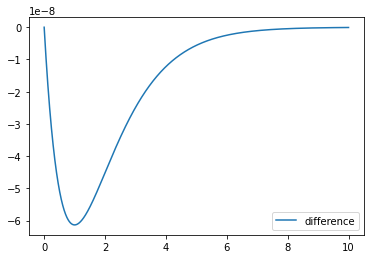

In [55]:
plt.plot(x2, diff, label="difference")
plt.legend()
plt.show()

## Question 5
Write a function $\tt Integrator(F,x)$ which solves the differential equation $\vec y' = \vec F(x,\vec y)$ on the interval $[0,x]$ by the 4th order Runge-Kutta method, for a two-dimensional vector $\vec y$, with initial condition $\vec y(0) = (1,1)^T$ (the column vector with all 1's). The integrator should output the solution at the point $x$; assume that $x > 0$, and take subintervals of lengths 0.1. Then, solve the equation $\vec y' = A\vec y$ where $A = \left(\begin{matrix} 2 & 3 \\ 0 & -2 \end{matrix}\right)$ using this integrator.<br><br>Then, implement the analytical solution $\vec y(x) = \exp(Ax)(1,1)^T$ by importing scipy.linalg and using its method expm for exponentiation of a matrix, and compare with your numerical solution by printing both numerical and analytical solutions at various values of $x$.

In [64]:
import scipy.linalg

In [65]:
def F_v(x, y_v):
    return np.dot(np.array([[2,3],[0,-2]]),y_v)

In [142]:
def RK4(init, interval, F, h):
    
    n = round((interval[1]-interval[0])/h)
    
    #initialize x
    x = np.arange(interval[0], interval[1]+h, h)
    
    #initialize y
    y = np.zeros((n+1, len(init)))
    y[0] = init
    
    #populate y
    for i in range(n):
        K0 = h*F(interval[0]+i*h, y[i])
        K1 = h*F(interval[0]+(i+0.5)*h, y[i] + K0/2)
        K2 = h*F(interval[0]+(i+0.5)*h, y[i] + K1/2)
        K3 = h*F(interval[0]+(i+1)*h, y[i] + K2)
        y[i+1] = y[i] + (K0 + 2*K1 + 2*K2 + K3)/6
        
    return y[-1]


In [143]:
y0 = np.array([[1],[1]])

In [144]:
def Integrator(F,x):
    h = 0.1
    init = [1,1]
    return RK4(init, [0,x], F, 0.1)

In [145]:
Integrator(F_v, 1)

array([12.82905151,  0.13533955])

In [146]:
Integrator(F_v, 2)

array([9.55287098e+01, 1.83167934e-02])

In [89]:
A = np.array([[2,3],[0,-2]])

In [92]:
np.dot(scipy.linalg.expm(A), np.array([[1],[1]]))

array([[12.82934671],
       [ 0.13533528]])

In [147]:
np.dot(scipy.linalg.expm(2*A), np.array([[1],[1]]))

array([[9.55330258e+01],
       [1.83156389e-02]])